# Final Project - Fraud Detection

---
Margarita Kholostova

Date: December 12, 2024

---

<div style="page-break-after: always;"></div>

## Introduction

Fraudulent transactions are a major challenge in the financial world, affecting individuals, businesses, and banks. With the rise of online payments and digital banking, detecting fraud has become more important than ever to protect people’s money and maintain trust in financial systems. Fraud can happen in many forms, like unauthorized credit card use or fake transactions, and identifying these quickly is key to preventing bigger problems.

In this project, we focus on using data to detect fraudulent transactions. By analyzing past transaction patterns, we aim to identify clear signs of fraud and test methods to flag suspicious activities. The project includes steps like cleaning the data, building a machine learning model, and testing how well it can detect fraud. By the end, we hope to provide a reliable approach to help reduce fraud and improve the safety of financial systems.

## Analysis



#### Needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay





### EDA

In [2]:
filename = 'transactions.csv'
df= pd.read_csv(filename)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

#### Data Cleaning

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

No missing values.

In [5]:
duplicates_sum = df.duplicated().sum()
print("These many rows are duplicated: ", duplicates_sum)

These many rows are duplicated:  1081


In [6]:
# Identify duplicate rows and display
duplicates = df[df.duplicated()]
print(duplicates)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(283726, 31)

No duplicates present.

### Summary Statistics

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Class imbalance check

In [10]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

We can see that we have a huge class imbalance, where there are many more non-fraudulent transactions (class 0) and much fewer fraudulent transactions (class 1), which is typical for datasets related to financial transactions. One of the ways to fix this is to use the SMOTE technique to upsample the minority class.

### Feature exploration

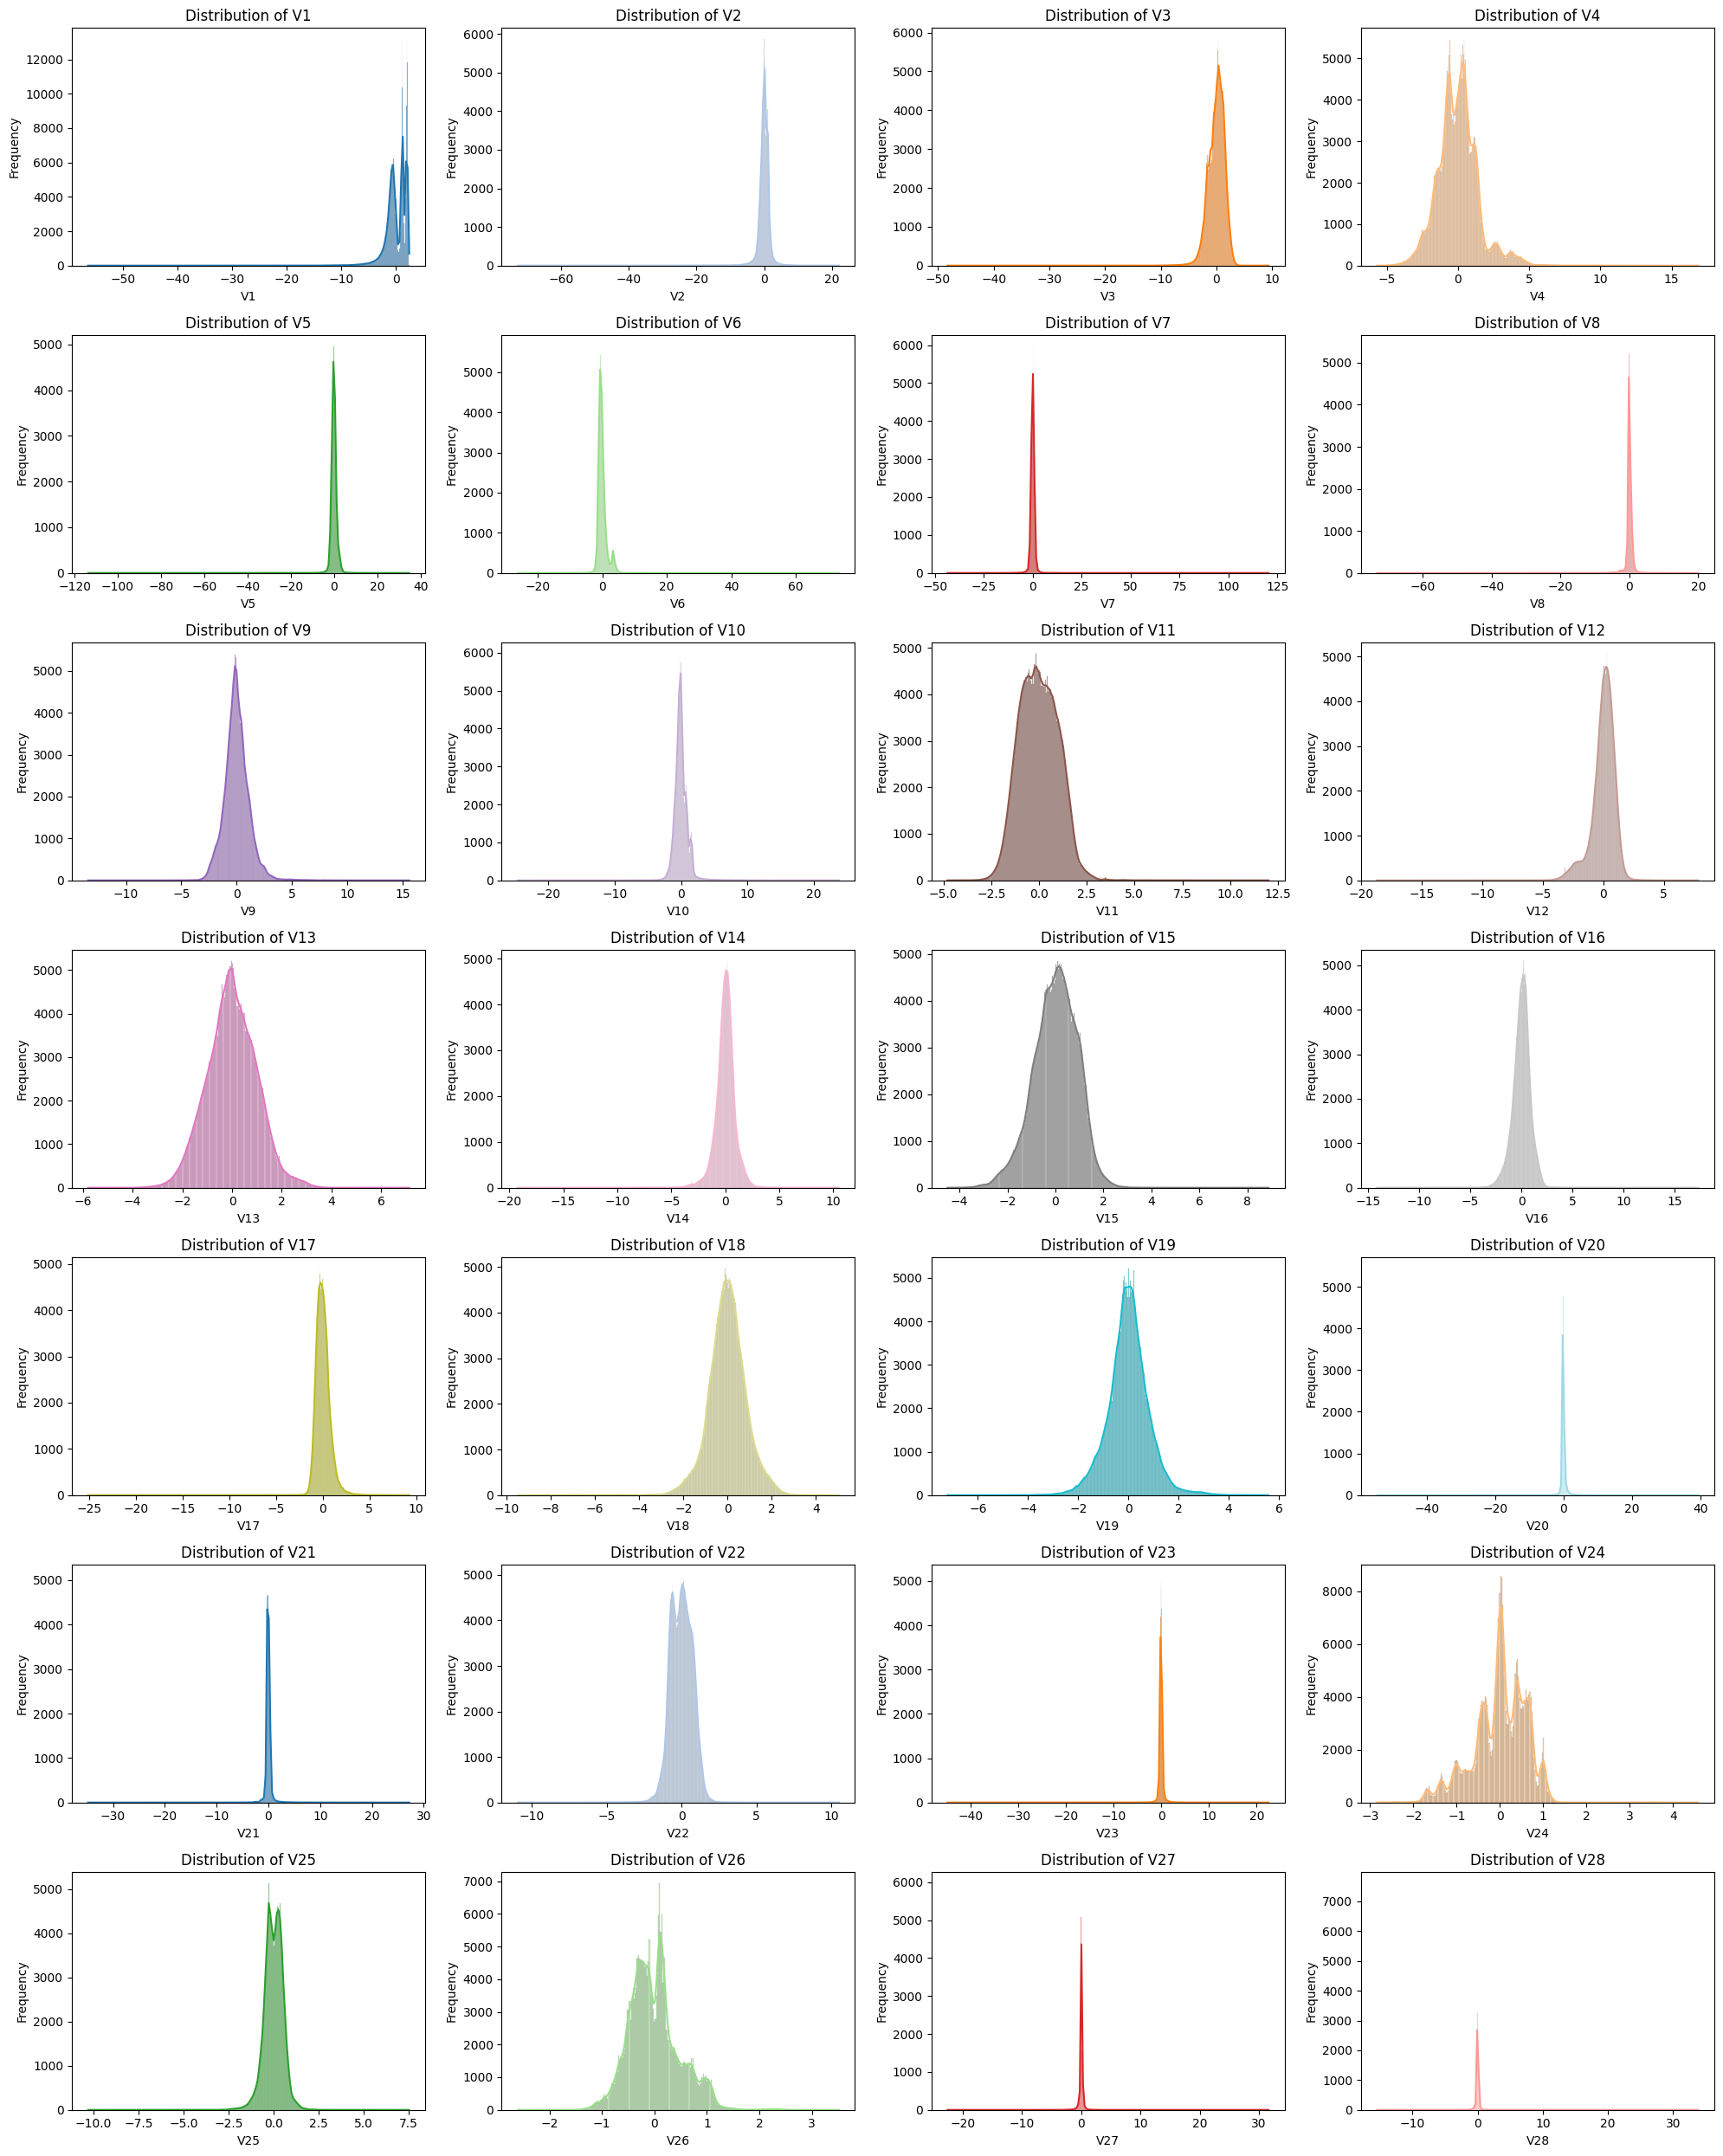

In [11]:
# Define PCA features (V1 to V28)
pca_features = [col for col in df.columns if col.startswith('V')]

# Set up a grid of subplots (4 columns, 7 rows)
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot distributions for each PCA feature
for i, col in enumerate(pca_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color=plt.cm.tab20(i % 20))
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots (if any)
for j in range(len(pca_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



Figure 1. Plots of feature distributions

Most features are normally distributed and centered around 0, with some features showing slight skewness or long tails. A few features, like V1, V24 and V26, show irregular distributions with noticeable peaks and asymmetries, indicating potential anomalies or unique patterns. These irregularities might highlight specific behaviors, such as unusual transactions, that could correlate with fraud. 

Next, we will plot distributions of each feature by class to identify how fraudulent and non-fraudulent transactions differ across the dataset. These plots help us detect patterns, such as feature ranges where fraud is more likely, and highlight the features that provide the most separation between classes

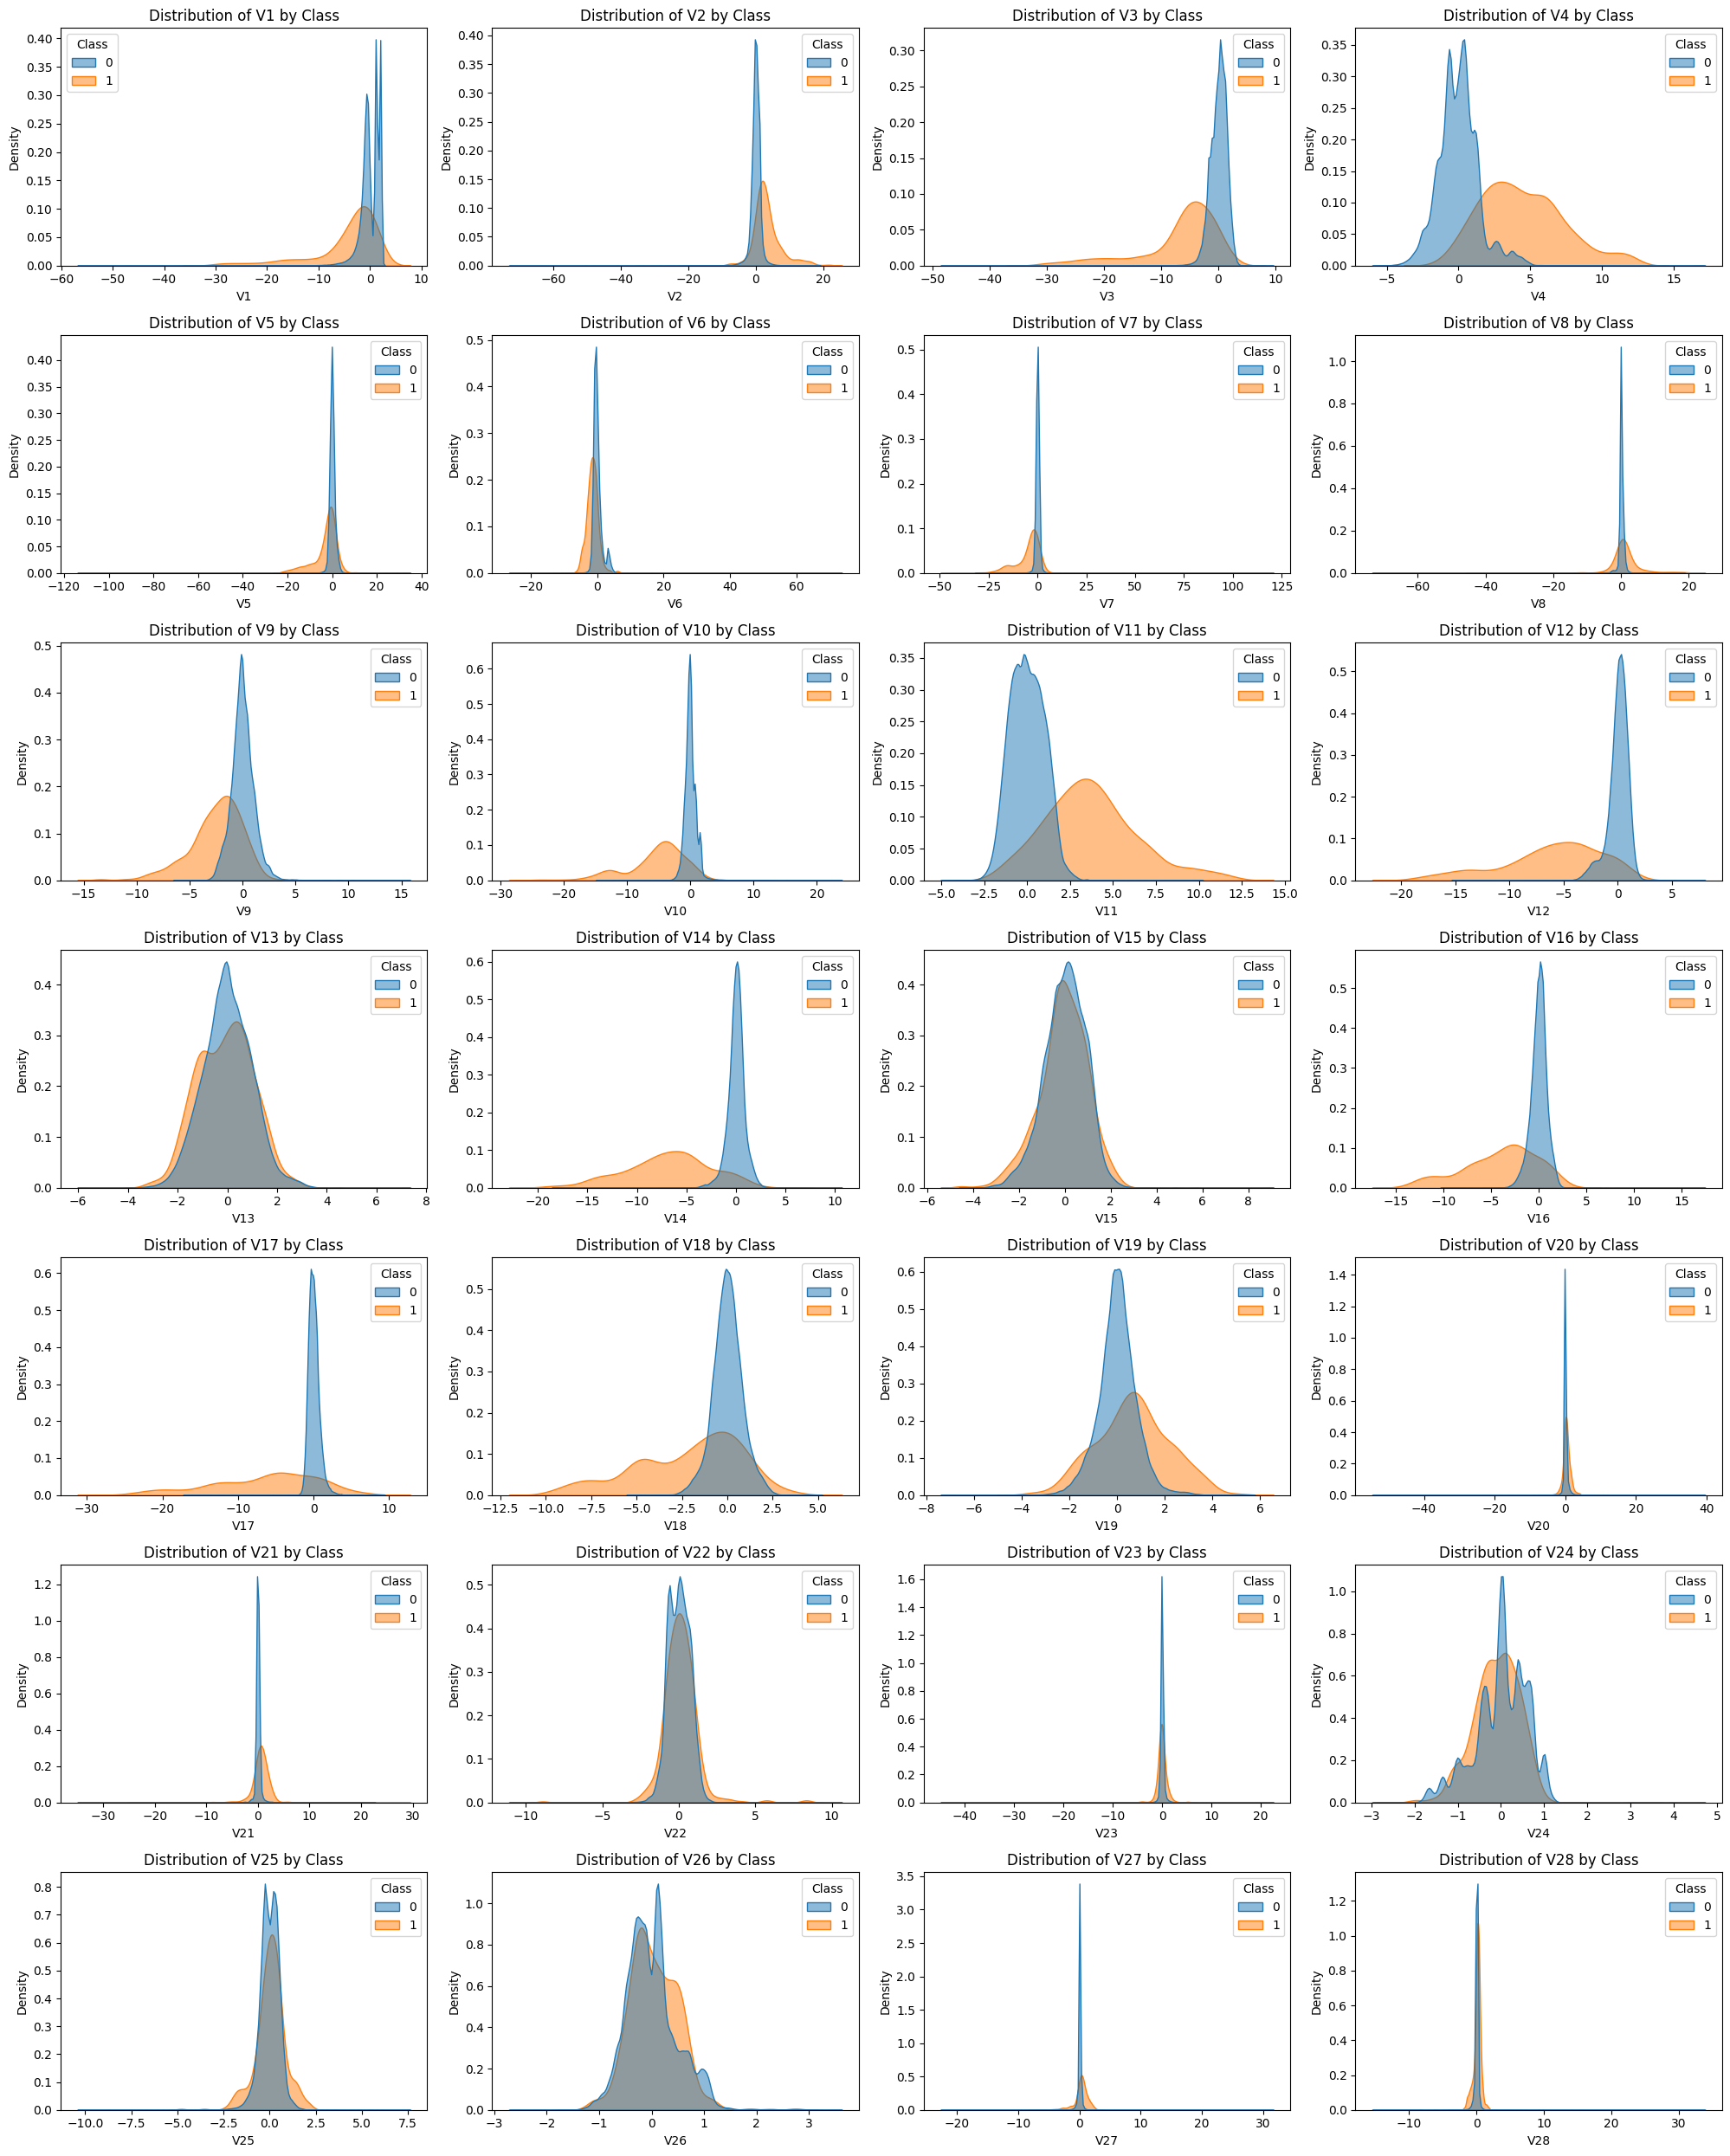

In [12]:
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(pca_features):
    sns.kdeplot(data=df, x=col, hue='Class', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Class')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(pca_features), len(axes)):
    axes[j].axis('off')  # Turn off empty axes

plt.tight_layout()
plt.show()

Figure 2. Distributions of each feature by class

From these plot we can separate these features by three groups of importance for our analysis. 
- V1, V3, V4, V10, and V24 show strong separations and are crucial for identifying fraud.
- V9, V12, V13, V19, and V26 show some separation and could add value when combined with other features.
- V5, V6, V8, V14, V16, V21, V25, and V27 show little to no separation and may contribute less independently.

### Correlation Matrix of Features

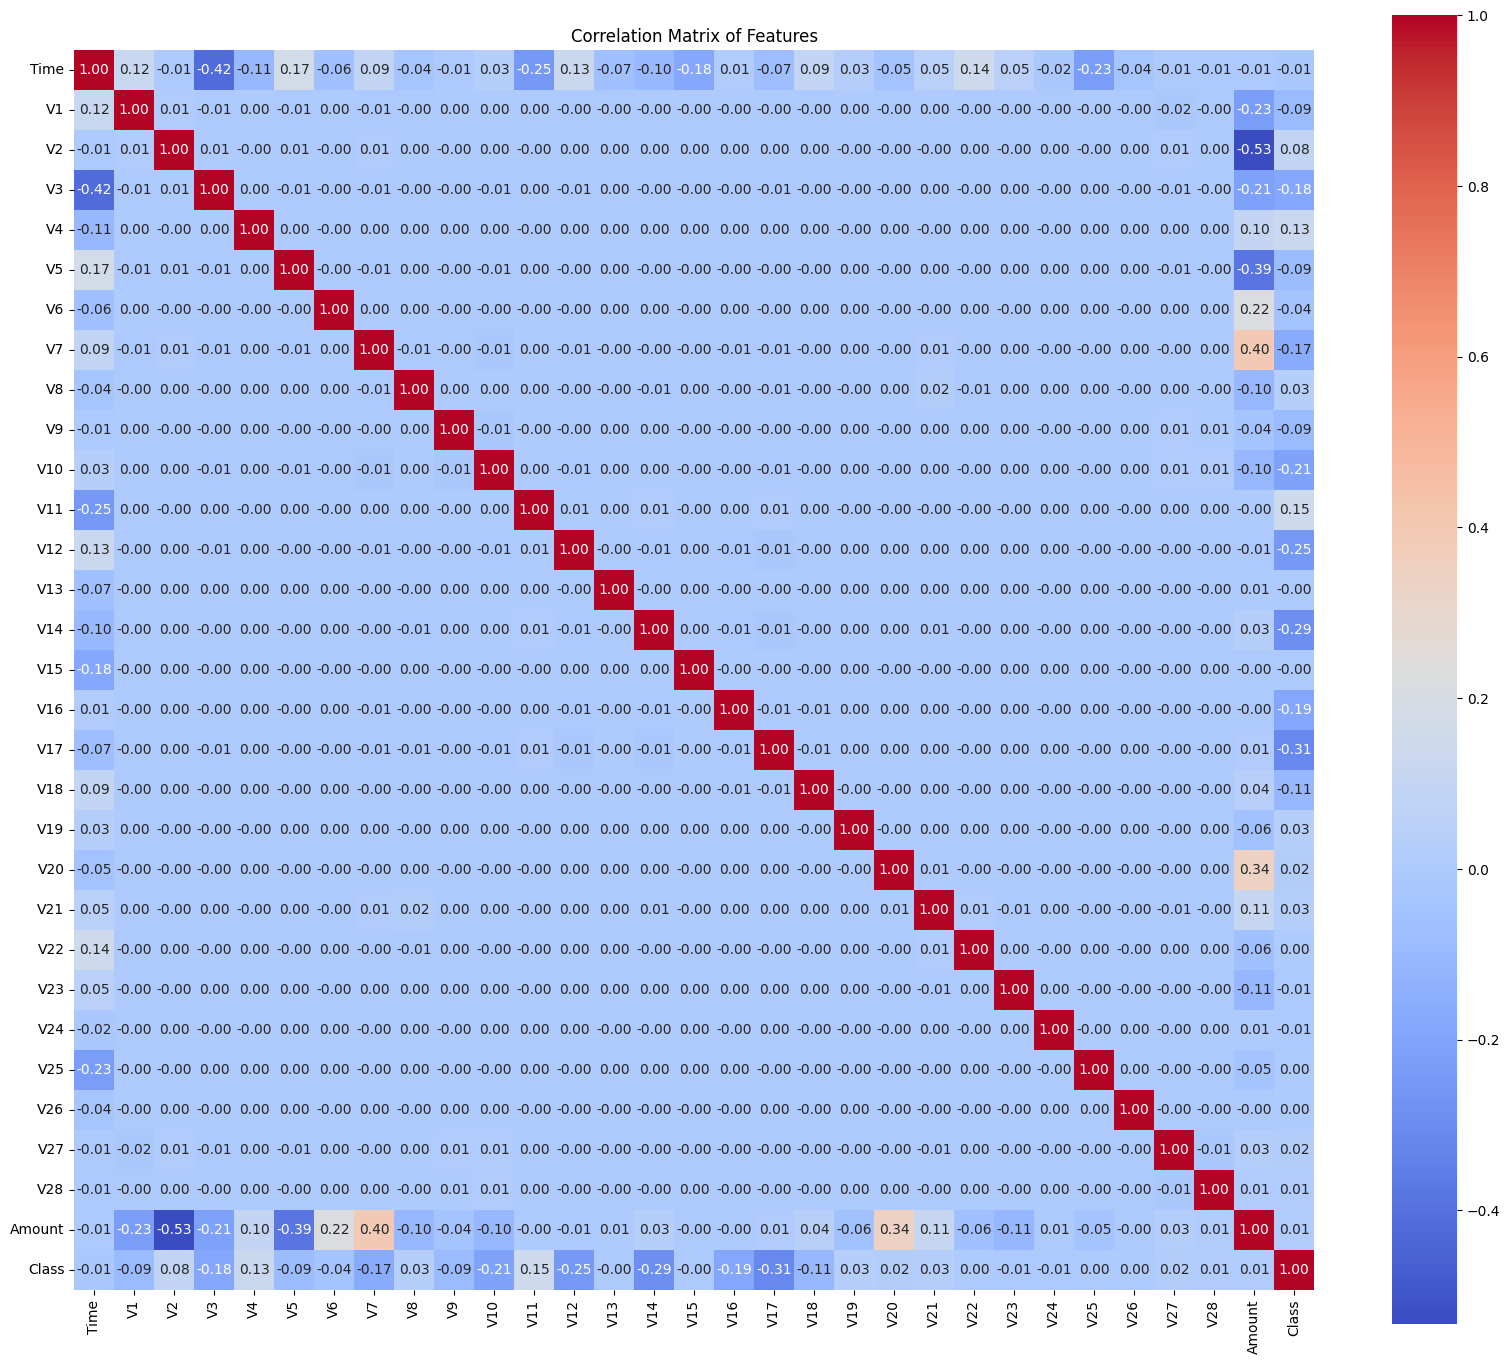

In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20,17))
sns.heatmap(
    correlation_matrix,
    annot=True, 
    cmap="coolwarm",
    fmt=".2f",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix of Features")
plt.show()

Figure 3. Correlation Matrix of Features

### Outlier detection

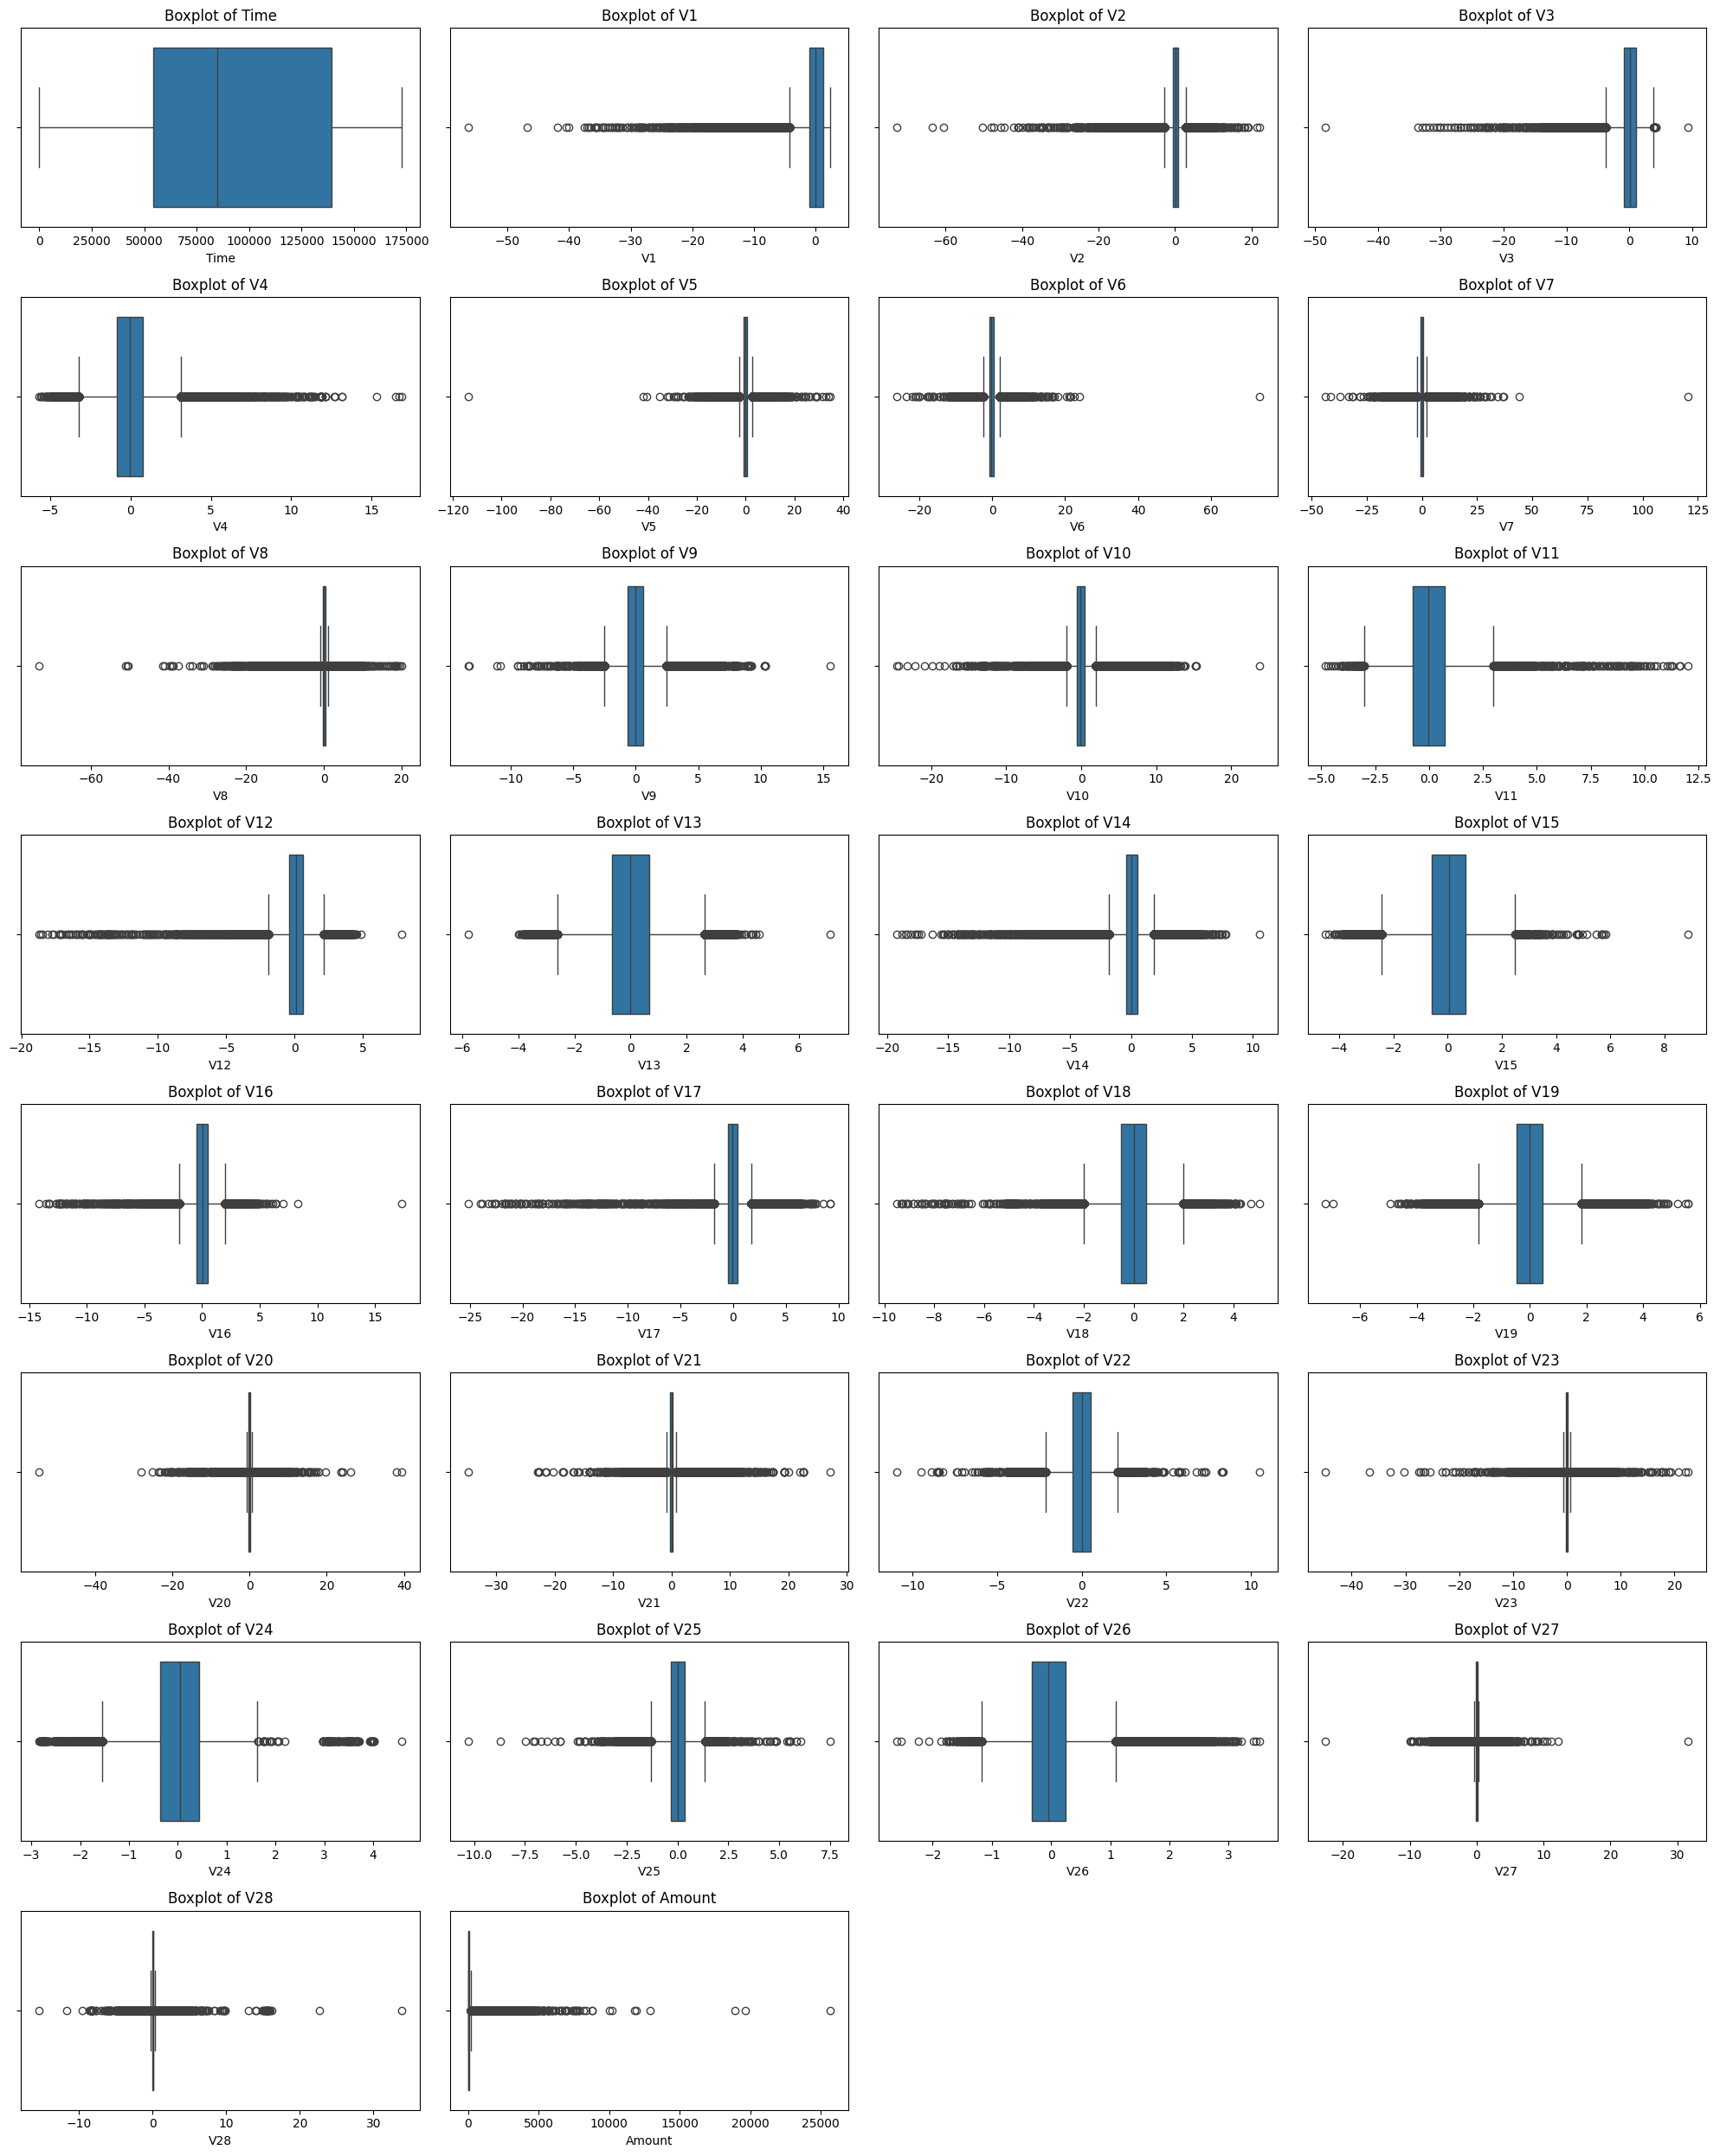

In [14]:
n_features = 30  # Total features to plot
n_rows = 8  # Number of rows 
n_cols = 4  # Number of columns 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))  # Dynamic grid size
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(df.columns[:n_features]): 
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Turn off unused subplots
for j in range(len(df.columns[:n_features]), len(axes)):  
    axes[j].axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Figure 4. Boxplots of feature's outliers.

Many features exhibit significant outliers, as seen by the points lying beyond the whiskers of the boxplots. However, we don't know if those outliers contain important information or represent critical anomalies.

Plan for next actions:

1. Split data on train and test to exclude data leakage.
2. Handle class misbalance with SMOTE
3. Keep outliers
4. Scale the data
5. Use algortihms like Random Forest, Gradient Boosting or XGBoost that can handle outliers effectively.
6. Check results.
7. Try capping outliers and evaluate its impact on perfomance.
8. If needed, use different algorithms

#### 1. Data Splitting

We splitting the data before any modifictation to exclude possible data leakage. We will transform training data, but test data will stay untouched.

In [15]:
X = df.drop('Class', axis=1)  
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### 2. Apply SMOTE to handle class misbalance.

As observed earlier, our dataset is highly imbalanced, which is common in financial data when the goal is to predict fraudulent transactions. This imbalance arises because the number of fraudulent transactions is typically much smaller compared to the number of non-fraudulent transactions.

In [16]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
0    226602
1    226602
Name: Class, dtype: int64


#### 3. Scale data

In [17]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### 4. Train Random Forest

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

#### 5. Evaluate the results

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC Score: 0.9609531675475603


The model achieves perfect precision, recall, and F1 score for class 0 (non-fraudulent transactions) but slightly struggles with predicting minority class 1 (fraudulent transactions). ROC-AUC score of 0.96 indicates strong performance in distinguishing between two classes.

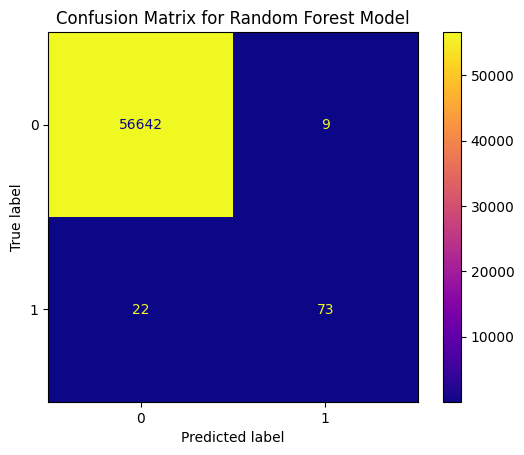

In [20]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="plasma") 
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

Figure 5. Confusion Matrix for Random Forest model

### 6. Random Forest Threshold Change

From the confusion matrix above, we can see that the model correctly predicted nearly all non-fraudulent cases. However, out of 95 actual fraudulent cases, it correctly identified only 73. Since the cost of misclassifying fraudulent transactions is much higher than that of misclassifying non-fraudulent ones, it makes sense to adjust the default decision threshold. This adjustment would make the model more focused on correctly predicting fraudulent transactions.

Next, we will analyze the Precision-Recall vs. Threshold curve to determine the optimal threshold that improves the model's ability to detect fraud without significantly compromising accuracy.

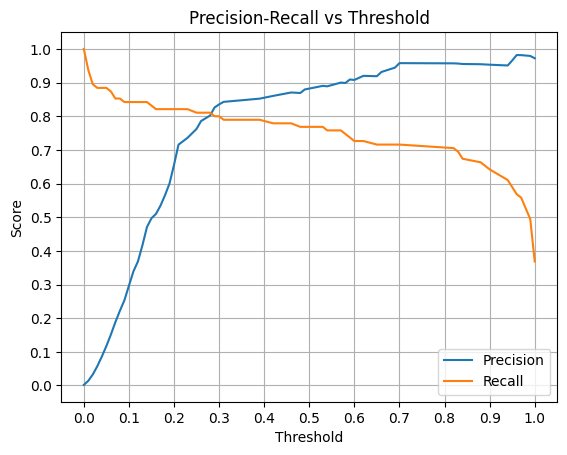

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)


# Create ticks at intervals of 0.1
threshold_ticks = np.arange(0.0, 1.1, 0.1)
score_ticks = np.arange(0.0, 1.1, 0.1)

# Plot Precision-Recall vs Threshold
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')

# Set ticks and grid
plt.xticks(threshold_ticks)
plt.yticks(score_ticks)
plt.grid(True)
plt.legend()
plt.show()

Figure 6. Precision-Recall vs. Threshold

In our case, recall is more critical than precision because, as mentioned earlier, the cost of misclassifying fraudulent transactions is significantly higher. Therefore, we aim to maximize recall while minimizing the loss in precision.

From the plot, we observe that both metrics remain above 0.8 when the threshold is around 0.28. However, we can afford a slight drop in precision to further increase recall. Adjusting the threshold to approximately 0.22 seems reasonable, as it offers a better balance between maximizing recall and maintaining acceptable precision.

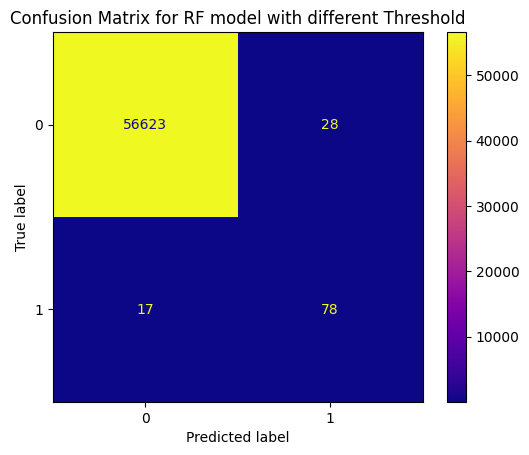

In [22]:
y_pred_threshold = (y_pred_proba > 0.22).astype(int)  # Lower threshold to favor class 1

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="plasma") 
plt.title("Confusion Matrix for RF model with different Threshold")
plt.show()

Figure 7. Confusion Matrix for RF model with different Threshold

As seen from the confusion matrix, adjusting the threshold results in 5 additional correctly classified fraudulent transactions. While this increase might seem insignificant at first glance, the financial impact could be substantial depending on the monetary value of these transactions.

In [23]:
print("Classification Report after threshold change:")
print(classification_report(y_test, y_pred_threshold))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report after threshold change:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.74      0.82      0.78        95

    accuracy                           1.00     56746
   macro avg       0.87      0.91      0.89     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC Score: 0.9609531675475603


Our recall went up from .88 to .91, and precision went down from .94 to .87. Even though we lost a bit in the model performance, we gained in correctly classified fraudulent transactions.




Since we used a Random Forest model, it is important to conduct cross-validation to ensure that the model is not overfitting and performs consistently across different subsets of the data.


cv_scores = cross_val_score(rf_model, X_train_scaled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-Validation AUC-ROC Scores:", cv_scores)
print("Mean CV AUC-ROC Score:", cv_scores.mean())

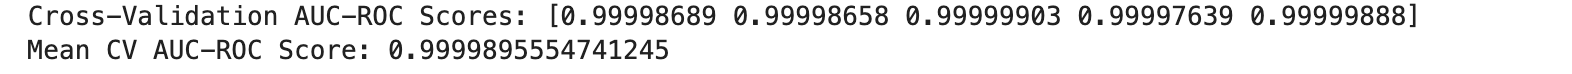

Figure 8. Screenshot of Cross-Validation results

On Figure 8 we kept CV search results, because for script to run faster the cell will be changed to markdown.

### 7. Feature Optimization

Next, it would be valuable to analyze which features had the most significant impact on the model's performance. Understanding feature importance can provide insights into the key drivers of the predictions.

   Feature  Importance
14     V14    0.219694
10     V10    0.130899
12     V12    0.108923
4       V4    0.101604
17     V17    0.093306
3       V3    0.073629
11     V11    0.052311
16     V16    0.040696
2       V2    0.038395
9       V9    0.026413


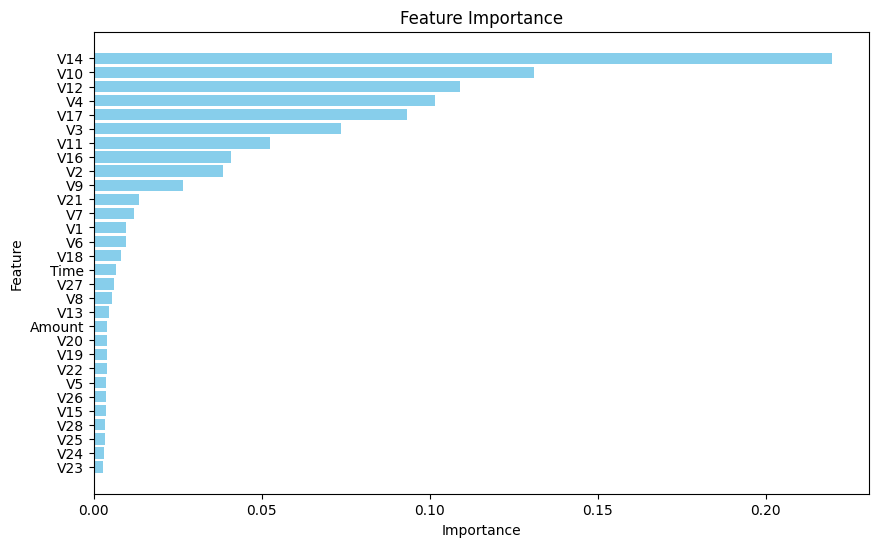

In [24]:
# Extract feature importance values
feature_importances = rf_model.feature_importances_

feature_names = X_train.columns 

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Adjust the number to display more or fewer features

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Figure 9. Feature Importance

After this we could go with two approaches:
1. Try different algorithms
2. Try to improve the baseline result of Random Forest by hyperparameters.

We will go with the second approach—improving the baseline Random Forest by tuning hyperparameters—because Random Forest already demonstrated good performance and interpretability in our problem. By refining parameters like n_estimators, max_depth, or class_weight, we can potentially enhance recall without switching to a completely different algorithm, saving time and leveraging the model’s existing strengths.

Also, we will use only 10 most important features since we have this information by running Feature Importance.

In [25]:
# Select the top 10 features
top_features = importance_df.head(10)['Feature'].tolist()

# Reduce datasets to the top features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]


### 8. Grid Search RF Optimization

Because we reducing amount of features, we need to perform features reduction on the resampled training data.

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
#print("Class distribution after SMOTE:")
#print(Counter(y_train_resampled))

# Select the top 10 features from importance_df
top_features = importance_df.head(10)['Feature'].tolist()

# Reduce the resampled training set to the top 10 features
X_train_reduced = X_train_resampled[top_features]
X_test_reduced = X_test[top_features]


In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}


# Perform grid search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=3
)

# Fit GridSearchCV on the reduced feature set
grid_search.fit(X_train_reduced, y_train_resampled)

# Get the best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


The Grid Search takes a lot of time to run, so I will save result in file for easy future access.

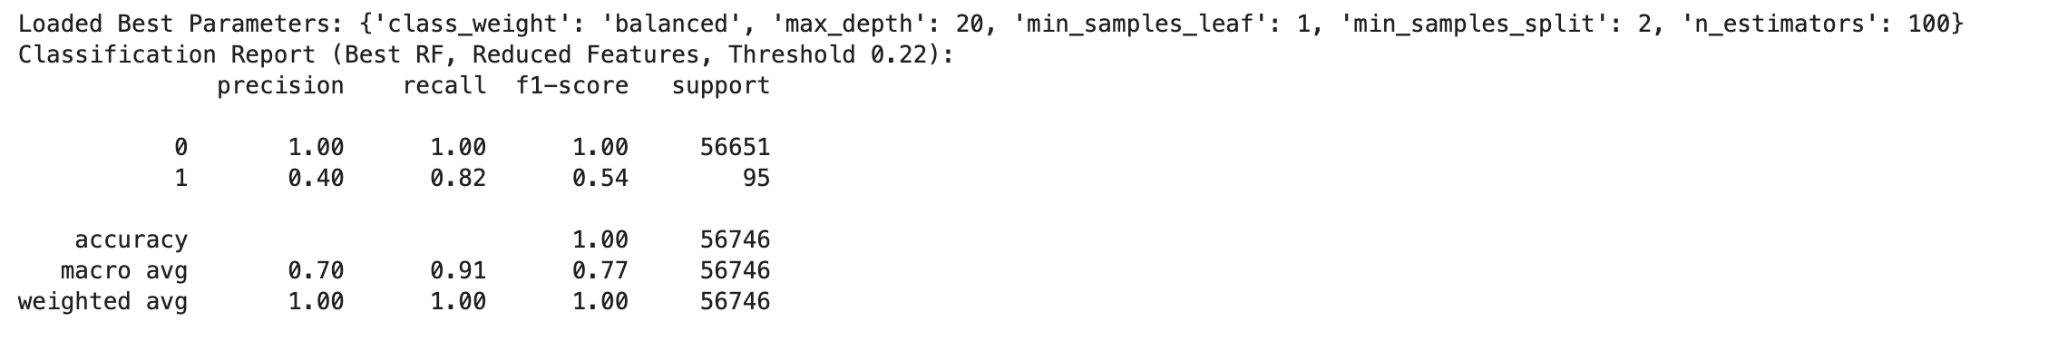

import pickle

# Save the best parameters
with open("best_params.pkl", "wb") as f:
    pickle.dump(grid_search.best_params_, f)

# Save the best model 
with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

In [28]:
import pickle

# Load the best parameters
with open("best_params.pkl", "rb") as f:
    best_params = pickle.load(f)
print("Loaded Best Parameters:", best_params)

# Load the best model
with open("best_rf_model.pkl", "rb") as f:
    best_rf_model = pickle.load(f)

# Predict probabilities using the best model
y_pred_probs_best = best_rf_model.predict_proba(X_test_reduced)[:, 1]

# Apply the threshold of 0.22
y_pred_threshold_best = (y_pred_probs_best > 0.22).astype(int)

print("Classification Report (Best RF, Reduced Features, Threshold 0.22):")
print(classification_report(y_test, y_pred_threshold_best))



Loaded Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report (Best RF, Reduced Features, Threshold 0.22):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.40      0.82      0.54        95

    accuracy                           1.00     56746
   macro avg       0.70      0.91      0.77     56746
weighted avg       1.00      1.00      1.00     56746



The **grid-searched RF model** reduced precision for the minority class (class 1) from **0.74** in the threshold-adjusted model to **0.40**, meaning it introduced more false positives. While both models maintain the same recall of **0.82**, the threshold-adjusted model achieves a better balance between precision and recall, as shown by its higher F1-score of **0.78** compared to **0.54** for the grid-searched model. Therefore, for fraud detection, where minimizing false positives is crucial, the threshold-adjusted model is clearly the better choice.

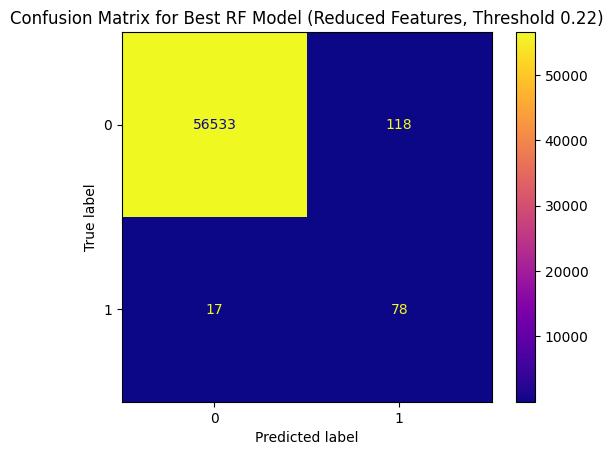

In [29]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap="plasma")
plt.title("Confusion Matrix for Best RF Model (Reduced Features, Threshold 0.22)")
plt.show()

Figure 10. Confusion Matrix for GridSearch

### SVM

Previously, we chose not to cap outliers because random forest algorithms are generally robust to their presence, and without domain-specific insight, we lacked a clear rationale for altering those data points. However, as we move on to the SVM model, which is more sensitive to outliers, we need to reconsider our approach. Therefore, our plan now is to cap the outliers, then apply appropriate resampling and scaling methods to ensure the SVM can perform effectively on the adjusted dataset.

### Outlier Capping

In [30]:
# Function to calculate capping limits
def calculate_capping_limits(df, cols, lower_percentile=0.01, upper_percentile=0.99):
    limits = {}
    for col in cols:
        lower_limit = np.percentile(df[col], lower_percentile * 100)
        upper_limit = np.percentile(df[col], upper_percentile * 100)
        limits[col] = (lower_limit, upper_limit)
    return limits

# Function to cap outliers using predefined limits
def cap_outliers_with_limits(df, limits):
    for col, (lower_limit, upper_limit) in limits.items():
        df[col] = np.clip(df[col], lower_limit, upper_limit)
    return df

# Step 1: Calculate capping limits from training data
numerical_cols = [col for col in X_train.columns if col != 'Class']
capping_limits = calculate_capping_limits(X_train, numerical_cols)

# Step 2: Cap outliers in training and test data using the same limits
X_train_capped = cap_outliers_with_limits(X_train.copy(), capping_limits)
X_test_capped = cap_outliers_with_limits(X_test.copy(), capping_limits)


In [31]:
#Resample the data w/ SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [32]:
# Calculate capping limits from resampled training data
numerical_cols = [col for col in X_train.columns if col != 'Class']  
capping_limits = calculate_capping_limits(X_train_resampled, numerical_cols)

#Cap outliers in resampled training and original test data using the same limits
X_train_capped = cap_outliers_with_limits(X_train_resampled.copy(), capping_limits)
X_test_capped = cap_outliers_with_limits(X_test.copy(), capping_limits)

# Scale the capped data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_capped)  
X_test_scaled = scaler.transform(X_test_capped)       



In [33]:
# Train the SVM model
svm_model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)


SVC(probability=True, random_state=42)

In [34]:
# Evaluate the model
y_pred_probs_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


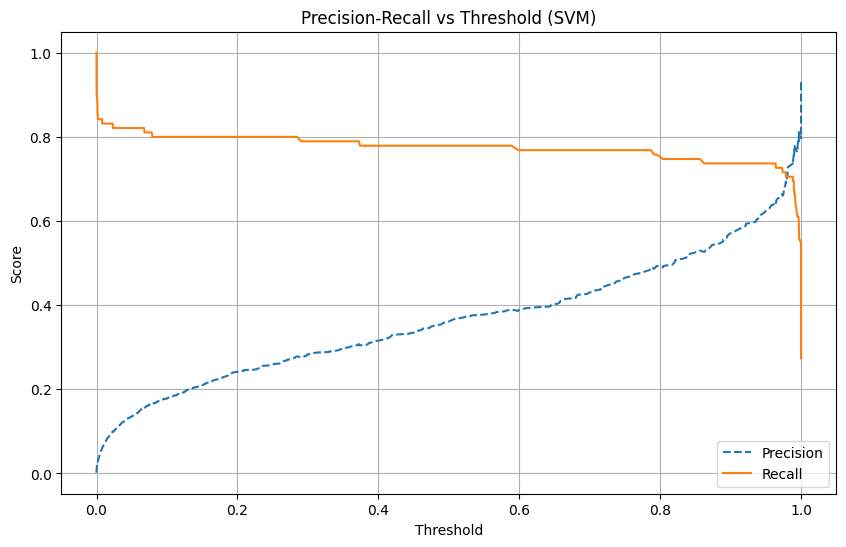

In [35]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs_svm)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (SVM)')
plt.grid(True)
plt.legend()
plt.show()



Figure 11. Presion-Recall vs Threshold (SVM)

Instead of relying only on visuals, we want to calculate precise threshold values to put on SVM.

In [38]:
# Calculate F1-score for each threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# Find the index of the best threshold (highest F1-score)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Precision at Best Threshold: {precision[best_threshold_index]}")
print(f"Recall at Best Threshold: {recall[best_threshold_index]}")
print(f"F1-Score at Best Threshold: {f1_scores[best_threshold_index]}")


Best Threshold: 0.9897076421275031
Precision at Best Threshold: 0.7586206896551724
Recall at Best Threshold: 0.6947368421052632
F1-Score at Best Threshold: 0.7252747252747253


In [52]:
threshold = 0.70
y_pred_threshold_svm = (y_pred_probs_svm > threshold).astype(int)

# Print classification report
print("Classification Report (SVM, Threshold 0.7):")
print(classification_report(y_test, y_pred_threshold_svm))

Classification Report (SVM, Threshold 0.7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.43      0.77      0.55        95

    accuracy                           1.00     56746
   macro avg       0.72      0.88      0.78     56746
weighted avg       1.00      1.00      1.00     56746



The SVM model shows near-perfect performance on the majority class, achieving precision, recall, and F1-scores of 1.00 for class 0. However, when identifying the minority class, the precision drops to 0.43 while maintaining a decent recall of 0.77, indicating some success in detecting the minority category but with limited precision. Overall, the results suggest the model excels at recognizing the dominant class but struggles to accurately pinpoint the minority cases without misclassifying some negatives as positives.

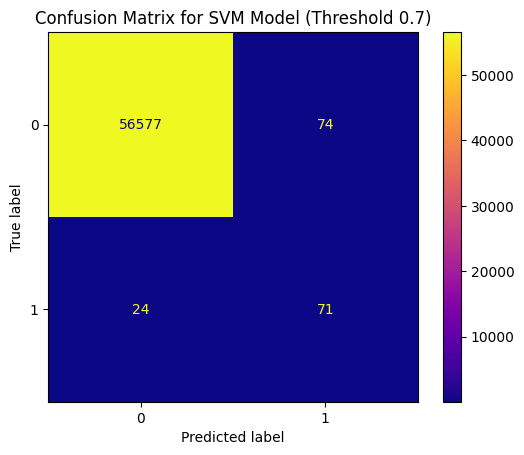

In [51]:
cm_svm = confusion_matrix(y_test, y_pred_threshold_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap="plasma")
plt.title("Confusion Matrix for SVM Model (Threshold 0.7)")
plt.show()


Figure 12. Confusion Matrix for SVM

The confusion matrix shows that the SVM model correctly identified the majority of negative cases (class 0) with very few misclassifications. However, while it successfully caught 71 actual positive cases, there were still 24 positives that went undetected and 74 instances where the model predicted positive when it was actually negative. These results highlight that although the model excels at recognizing the dominant class, distinguishing the minority class remains more challenging.

# Conclusions
This project focused on finding better ways to detect fraudulent transactions using machine learning. By handling issues like imbalanced data and choosing the right models, we aimed to accurately identify fraud. Techniques such as SMOTE were used to balance the data, and models like Random Forest and SVM were tested.

Adjusting the decision threshold in the Random Forest model helped catch more fraudulent cases, even though it slightly reduced precision. The analysis of important features showed which data points are most useful for spotting fraud. The SVM model also performed well but needed extra steps to handle outliers.

In summary, this project shows that improving fraud detection requires the right balance between accuracy and practical outcomes. These findings can help create better fraud detection systems to make financial transactions safer.

# References
1. Fatima, N. (2024, July 2). Algorithms sensitive to outliers and how to handle them. Medium. https://medium.com/@noorfatimaafzalbutt/algorithms-sensitive-to-outliers-and-how-to-handle-them-ff989296b9e5 
2. Hong, Z. (2024, April 20). Fraud detection with machine learning: Identifying suspicious patterns in financial transactions. Medium. https://medium.com/@zhonghong9998/fraud-detection-with-machine-learning-identifying-suspicious-patterns-in-financial-transactions-8558f3f1e22a 
3. How to use classification threshold to balance precision and recall. Evidently AI - Open-Source ML Monitoring and Observability. (n.d.). https://www.evidentlyai.com/classification-metrics/classification-threshold 
4. Randomforestclassifier. scikit. (n.d.-a). https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
5. SVC. scikit. (n.d.-b). https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html 
6. Your guide to machine learning for fraud prevention: Ravelin technology. Ravelin. (n.d.). https://www.ravelin.com/insights/machine-learning-for-fraud-detection 